In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/70-dog-breedsimage-data-set/dogs.csv
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/10.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/03.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/01.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/02.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/09.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/05.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/06.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/04.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/08.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/07.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/American  Spaniel/10.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/American  Spaniel/03.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/American  Spaniel/01.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/American  Spaniel/02.jpg
/kaggle/input/70-dog-breedsimage-data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import PIL
import cv2
from tensorflow.keras.models import Sequential
import pathlib
import os

In [3]:
import keras
print(keras.__version__)

2.15.0


In [16]:
def getData(path):
    data_dir=pathlib.Path(path)
    trainList=list(data_dir.glob('*/*.jpg'))
    classesPath=os.listdir(path)
    imagesDict={}
    for dogFolder in classesPath:
        imagesDict[dogFolder]=list(data_dir.glob(f'{dogFolder}/*'))
    label={}
    for i in range(0,len(classesPath)):
        label[classesPath[i]]=i
    x=[]
    y=[]
    for image,imgpath in imagesDict.items():
        indx=label[image]
        for img in imgpath:
            photo=cv2.imread(str(img))
            resizedImg=cv2.resize(photo,(224,224))
            x.append(resizedImg)
            y.append(indx)
    x=np.array(x)
    y=np.array(y)
    return x,y

In [17]:
trainPath="/kaggle/input/70-dog-breedsimage-data-set/train"
testPath="/kaggle/input/70-dog-breedsimage-data-set/test"
valPath="/kaggle/input/70-dog-breedsimage-data-set/valid"
x_train,y_train=getData(trainPath)

In [18]:
x_val,y_val=getData(valPath)

In [19]:
x_val.shape

(700, 224, 224, 3)

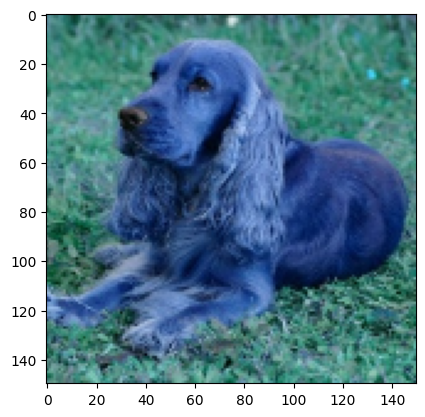

In [10]:
plt.imshow(x_train[0])
plt.show()

In [11]:
dataAugment=Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical",input_shape=(150,150,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(.2)
])

In [15]:
model=Sequential([
    keras.layers.Rescaling(1.0 / 255, input_shape=(224,224,3)),
    dataAugment,
    keras.layers.Conv2D(16,3,padding="same",activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64,3,padding="same",activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128,3,padding="same",activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(.2),
    keras.layers.Conv2D(256,3,padding="same",activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(126,activation="relu"),
    keras.layers.Dense(70,activation='softmax')
])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     5,308,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 126)            │        32,382 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 70)             │         8,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,728,696 (21.85 MB)

 Trainable params: 5,728,696 (21.85 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy,metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10, validation_data=(x_val, y_val))

In [13]:
import tensorflow_hub as hub
IMAGE_SHAPE=(224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-classification/4", input_shape=IMAGE_SHAPE+(3,))
])


Attaching 'None' from model 'google/mobilenet-v2/tensorflow2/tf2-preview-classification/4' to your Kaggle notebook...


In [21]:
print(x_train.shape)

(7946, 224, 224, 3)


In [24]:
res=classifier.predict(x_train[0].reshape(1,224,224,3))

1/1 [==============================] - 2s 2s/step


In [27]:
print(np.argmax(res))

795


In [28]:
image_labels = []
with open("/kaggle/input/tagname/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()

In [29]:
print(image_labels[np.argmax(res)])

shower curtain


In [32]:
feature_extractor_model = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

Attaching 'None' from model 'google/mobilenet-v2/tensorflow2/tf2-preview-feature-vector/4' to your Kaggle notebook...


In [33]:
num_of_flowers = 70

model2 = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      9280      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                 

In [36]:
model2.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model2.fit(x_train,y_train,epochs=5)

Epoch 1/5
  3/249 [..............................] - ETA: 8s - loss: 5.0207 - acc: 0.0000e+00   

I0000 00:00:1721568092.804256     268 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


249/249 [==============================] - 14s 35ms/step - loss: 3.9872 - acc: 0.0736
Epoch 2/5
249/249 [==============================] - 8s 32ms/step - loss: 3.3901 - acc: 0.1729
Epoch 3/5
249/249 [==============================] - 8s 32ms/step - loss: 3.1070 - acc: 0.2256
Epoch 4/5
249/249 [==============================] - 8s 32ms/step - loss: 2.8960 - acc: 0.2769
Epoch 5/5
249/249 [==============================] - 8s 32ms/step - loss: 2.7333 - acc: 0.3145


In [38]:
model2.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
249/249 [==============================] - 9s 36ms/step - loss: 1.9368 - acc: 0.5191 - val_loss: 2.9183 - val_acc: 0.2771
Epoch 2/30
249/249 [==============================] - 9s 35ms/step - loss: 1.8825 - acc: 0.5312 - val_loss: 2.9109 - val_acc: 0.2843
Epoch 3/30
249/249 [==============================] - 9s 35ms/step - loss: 1.8278 - acc: 0.5485 - val_loss: 2.9048 - val_acc: 0.2771
Epoch 4/30
249/249 [==============================] - 9s 35ms/step - loss: 1.7712 - acc: 0.5584 - val_loss: 2.9192 - val_acc: 0.2900
Epoch 5/30
249/249 [==============================] - 9s 35ms/step - loss: 1.7360 - acc: 0.5678 - val_loss: 2.8833 - val_acc: 0.2857
Epoch 6/30
249/249 [==============================] - 9s 35ms/step - loss: 1.6803 - acc: 0.5892 - val_loss: 2.9160 - val_acc: 0.2671
Epoch 7/30
249/249 [==============================] - 9s 35ms/step - loss: 1.6325 - acc: 0.6011 - val_loss: 2.8777 - val_acc: 0.2957
Epoch 8/30
249/249 [==============================] - 9s 35ms/step - 